In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('FuelConsumptionCo2.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


![](https://static.javatpoint.com/tutorial/data-science/images/data-science-components2.png)

- Statistic & Probability
- Linear algebra:  Dai so tuyen tinh
- Calculus: Giai tich --> Derivative, integral, limit, multivariable diffencial,...
- Optimization: 

- Computer science:
 - Programming, optimize complexity: time, space
 - Database: SQL, noSQL --> interface
 - Software engineering: Restful, cloud technology, backend, microservice,...

![](https://miro.medium.com/max/720/0*fsDYwoIbzuR4C4-Z)

![](https://miro.medium.com/max/1204/0*-068ud_-o3ajwq_z.jpg)

### 2. Data processing

In [3]:
df.head(3)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136


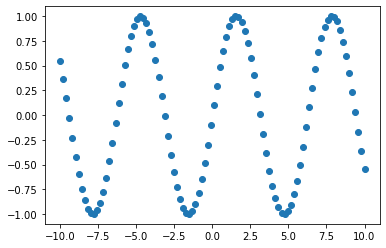

In [4]:
x = np.linspace(-10, 10, 100)
y = np.sin(x)
plt.scatter(x, y);

In [5]:
y = 2*x + 3 + np.random.normal(0, 4, size=x.shape[0])

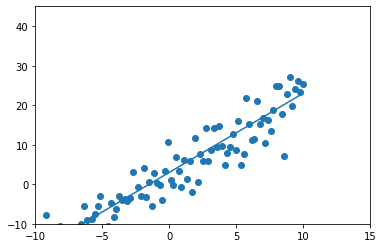

In [6]:
plt.scatter(x, y)
plt.xlim([-10, 15])
plt.ylim([-10, 45])
plt.plot(x, 2*x + 3);

In [7]:
2 * 15 + 3

33

In [8]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

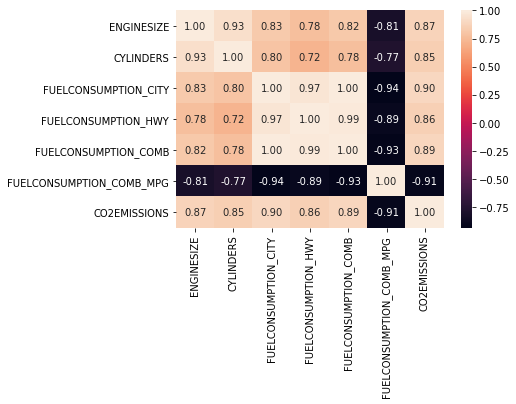

In [9]:
cols = ['ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']
sns.heatmap(df[cols].corr(), annot=True, fmt='.2f');

In [13]:
vital_cols = ['ENGINESIZE', 'FUELCONSUMPTION_HWY', 'CO2EMISSIONS']
vital_df = df[vital_cols]

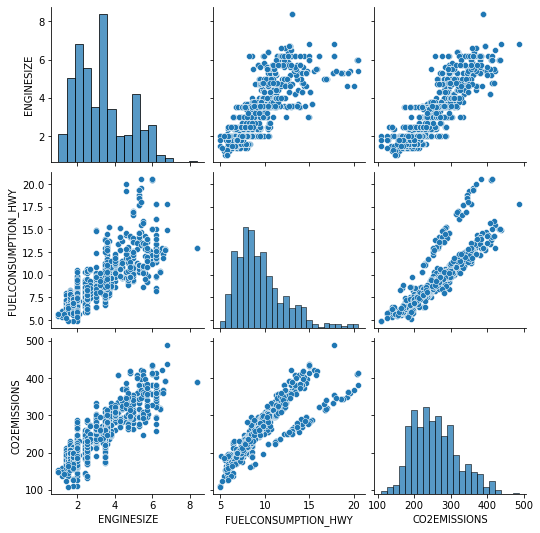

In [14]:
sns.pairplot(vital_df);

Supervised learning:
 - Regression: Continuous
 - Classification: discrete target

In [15]:
vital_df.head(2)

,ENGINESIZE,FUELCONSUMPTION_HWY,CO2EMISSIONS
0,2.0,6.7,196
1,2.4,7.7,221


**Validation**

![](https://algotrading101.com/learn/wp-content/uploads/2020/06/training-validation-test-data-set.png)

![](https://miro.medium.com/max/640/1*PdwlCactbJf8F8C7sP-3gw.png)

![](https://i.pinimg.com/originals/3a/42/97/3a4297c9a348c65f6a37b58ab638ed3d.png)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [17]:
features, label = vital_df[['ENGINESIZE']], vital_df[['CO2EMISSIONS']]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, shuffle=True, random_state=4)

In [20]:
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

CO2EMISSIONS = a * ENGINESIZE + b

In [23]:
linear = LinearRegression(normalize=True)
linear.fit(X_train, y_train)

LinearRegression(normalize=True)

In [26]:
y_predicted = linear.predict(X_test)
y_predicted = [i[0] for i in y_predicted]

In [28]:
pd.DataFrame({'actual': y_test.CO2EMISSIONS.values, 'predicted': y_predicted})

,actual,predicted
0,262,269.879443
1,237,203.380650
2,258,262.056055
3,271,262.056055
4,292,297.261299
...,...,...
209,262,203.380650
210,308,348.113317
211,354,308.996380
212,177,187.733875


In [29]:
r2_score( y_test.CO2EMISSIONS.values, y_predicted) * 100

81.49387318398212

In [30]:
mean_squared_error(y_test.CO2EMISSIONS.values, y_predicted)

687.1851023941659

In [31]:
mean_absolute_error(y_test.CO2EMISSIONS.values, y_predicted)

19.979977171018753

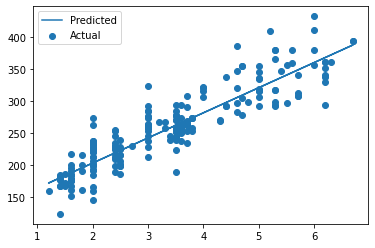

In [32]:
plt.scatter(X_test.ENGINESIZE.values, y_test.CO2EMISSIONS.values, label='Actual')
plt.plot(X_test.ENGINESIZE.values, y_predicted, label='Predicted')
plt.legend()
plt.show()

In [33]:
linear.coef_

array([[39.116937]])

In [34]:
linear.intercept_

array([125.14677576])

In [35]:
y_predicted = linear.coef_[0][0] * X_test.ENGINESIZE+ linear.intercept_[0]
y_predicted

834    269.879443
66     203.380650
983    262.056055
849    262.056055
110    297.261299
          ...    
631    203.380650
285    348.113317
15     308.996380
503    187.733875
725    262.056055
Name: ENGINESIZE, Length: 214, dtype: float64

## Two independent variables

In [37]:
features, label = vital_df[['ENGINESIZE', 'FUELCONSUMPTION_HWY']], vital_df[['CO2EMISSIONS']]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, shuffle=True, random_state=4)

In [39]:
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

CO2EMISSIONS = a * ENGINESIZE + b * FUELCONSUMPTION_HWY + c

In [40]:
linear = LinearRegression(normalize=True)
linear.fit(X_train, y_train)

LinearRegression(normalize=True)

In [41]:
y_predicted = linear.predict(X_test)
y_predicted = [i[0] for i in y_predicted]

In [42]:
pd.DataFrame({'actual': y_test.CO2EMISSIONS.values, 'predicted': y_predicted})

,actual,predicted
0,262,264.140189
1,237,218.282719
2,258,258.559571
3,271,265.922574
4,292,283.146425
...,...,...
209,262,227.749438
210,308,314.687085
211,354,315.184150
212,177,183.980614


In [43]:
r2_score( y_test.CO2EMISSIONS.values, y_predicted) * 100

87.47521984272798

In [44]:
mean_squared_error(y_test.CO2EMISSIONS.values, y_predicted)

465.08069572882096

In [45]:
mean_absolute_error(y_test.CO2EMISSIONS.values, y_predicted)

15.60619334955014